In [77]:
#importing libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import requests
from bs4 import BeautifulSoup
import nltk
from nltk.corpus import stopwords
from string import punctuation
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
import pickle

In [78]:
#loading data

df = pd.read_csv('/content/NetFlix.csv')

In [79]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,14-Aug-20,2020,TV-MA,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,15-Dec-17,2008,TV-MA,143,"Horror Movies, International Movies, Thrillers",An architect and his wife move into a castle t...
2,s100,Movie,3 Heroines,Iman Brotoseno,"Reza Rahadian, Bunga Citra Lestari, Tara Basro...",Indonesia,5-Jan-19,2016,TV-PG,124,"Dramas, International Movies, Sports Movies",Three Indonesian women break records by becomi...
3,s1000,Movie,Blue Mountain State: The Rise of Thadland,Lev L. Spiro,"Alan Ritchson, Darin Brooks, James Cade, Rob R...",United States,1-Mar-16,2016,R,90,Comedies,New NFL star Thad buys his old teammates' belo...
4,s1001,TV Show,Blue Planet II,NaN,David Attenborough,United Kingdom,3-Dec-18,2017,TV-G,1,"British TV Shows, Docuseries, Science & Nature TV",This sequel to the award-winning nature series...
...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s995,TV Show,Blown Away,NaN,NaN,Canada,12-Jul-19,2019,TV-14,1,"International TV Shows, Reality TV",Ten master artists turn up the heat in glassbl...
7783,s996,TV Show,Blue Exorcist,NaN,"Nobuhiko Okamoto, Jun Fukuyama, Kana Hanazawa,...",Japan,1-Sep-20,2017,TV-MA,2,"Anime Series, International TV Shows",Determined to throw off the curse of being Sat...
7784,s997,Movie,Blue Is the Warmest Color,Abdellatif Kechiche,"Léa Seydoux, Adèle Exarchopoulos, Salim Kechio...","France, Belgium, Spain",26-Aug-16,2013,NC-17,180,"Dramas, Independent Movies, International Movies","Determined to fall in love, 15-year-old Adele ..."
7785,s998,Movie,Blue Jasmine,Woody Allen,"Cate Blanchett, Sally Hawkins, Alec Baldwin, L...",United States,8-Mar-19,2013,PG-13,98,"Comedies, Dramas, Independent Movies",The high life leads to high anxiety for a fash...


In [80]:
#Total columns

print(list(df.columns))

['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'genres', 'description']


In [81]:
#Shape of the dataset
df.shape

(7787, 12)

In [82]:
# Description
df.describe()

,release_year,duration
count,7787.000000,7787.000000
mean,2013.932580,69.122769
std,8.757395,50.950743
min,1925.000000,1.000000
25%,2013.000000,2.000000
50%,2017.000000,88.000000
75%,2018.000000,106.000000
max,2021.000000,312.000000


In [83]:
# INformation about data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   int64 
 10  genres        7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(2), object(10)
memory usage: 730.2+ KB


In [84]:
# Checking duplicates
df.duplicated().sum()

0

**Exploratory Data Analysis**

<Figure size 2000x800 with 0 Axes>

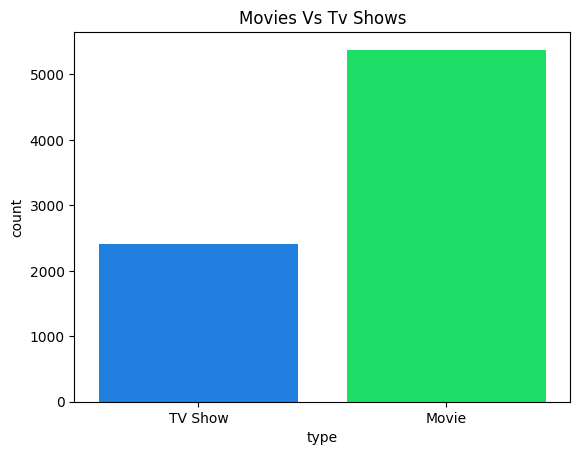

<Figure size 2000x800 with 0 Axes>

In [85]:
#Count of movies and Tv shows

sns.countplot(x = 'type' ,data =df)
plt.title('Movies Vs Tv Shows')
plt.figure(figsize=(20,8))

Text(0.5, 1.0, 'Percentage of type')

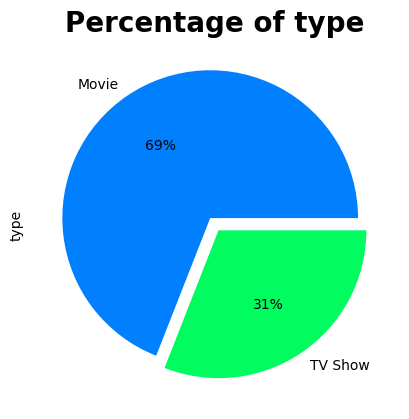

In [86]:
# distribution of Movies and Tv shows

sns.set_palette('gist_ncar')
df.type.value_counts().plot(kind='pie',autopct='%1.0f%%',explode=(0.05,0.05))
plt.title('Percentage of type',fontsize=20,fontweight='bold')

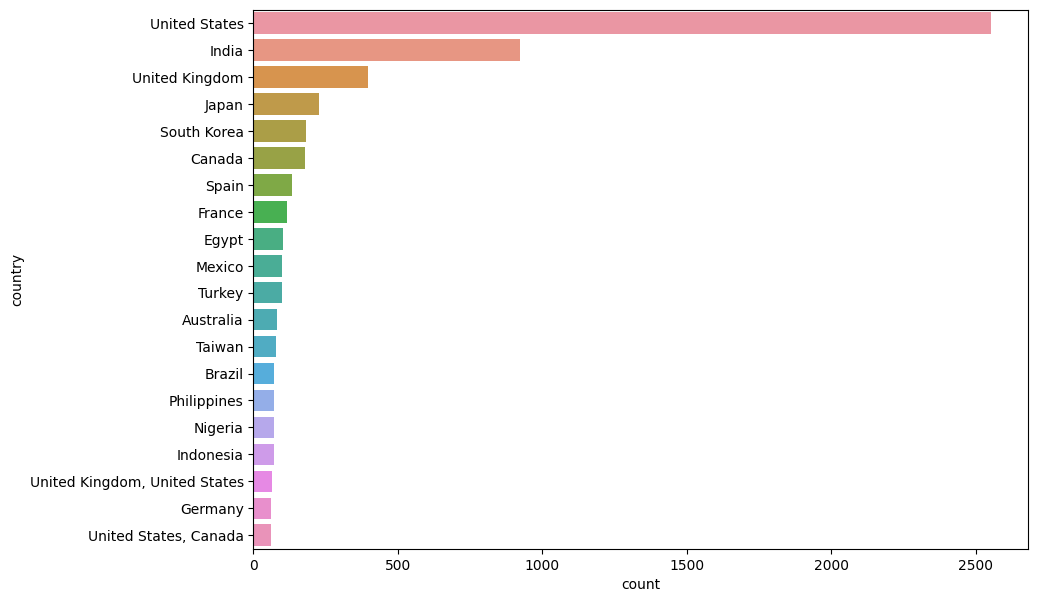

In [87]:
# Checking the Countries that streaming movies 

plt.figure(figsize=(10,7))
sns.countplot(y=df['country'], order=df['country'].value_counts().index[0:20])
ax=plt.xticks(rotation = 0)

Text(0.5, 1.0, 'top 10 Directors')

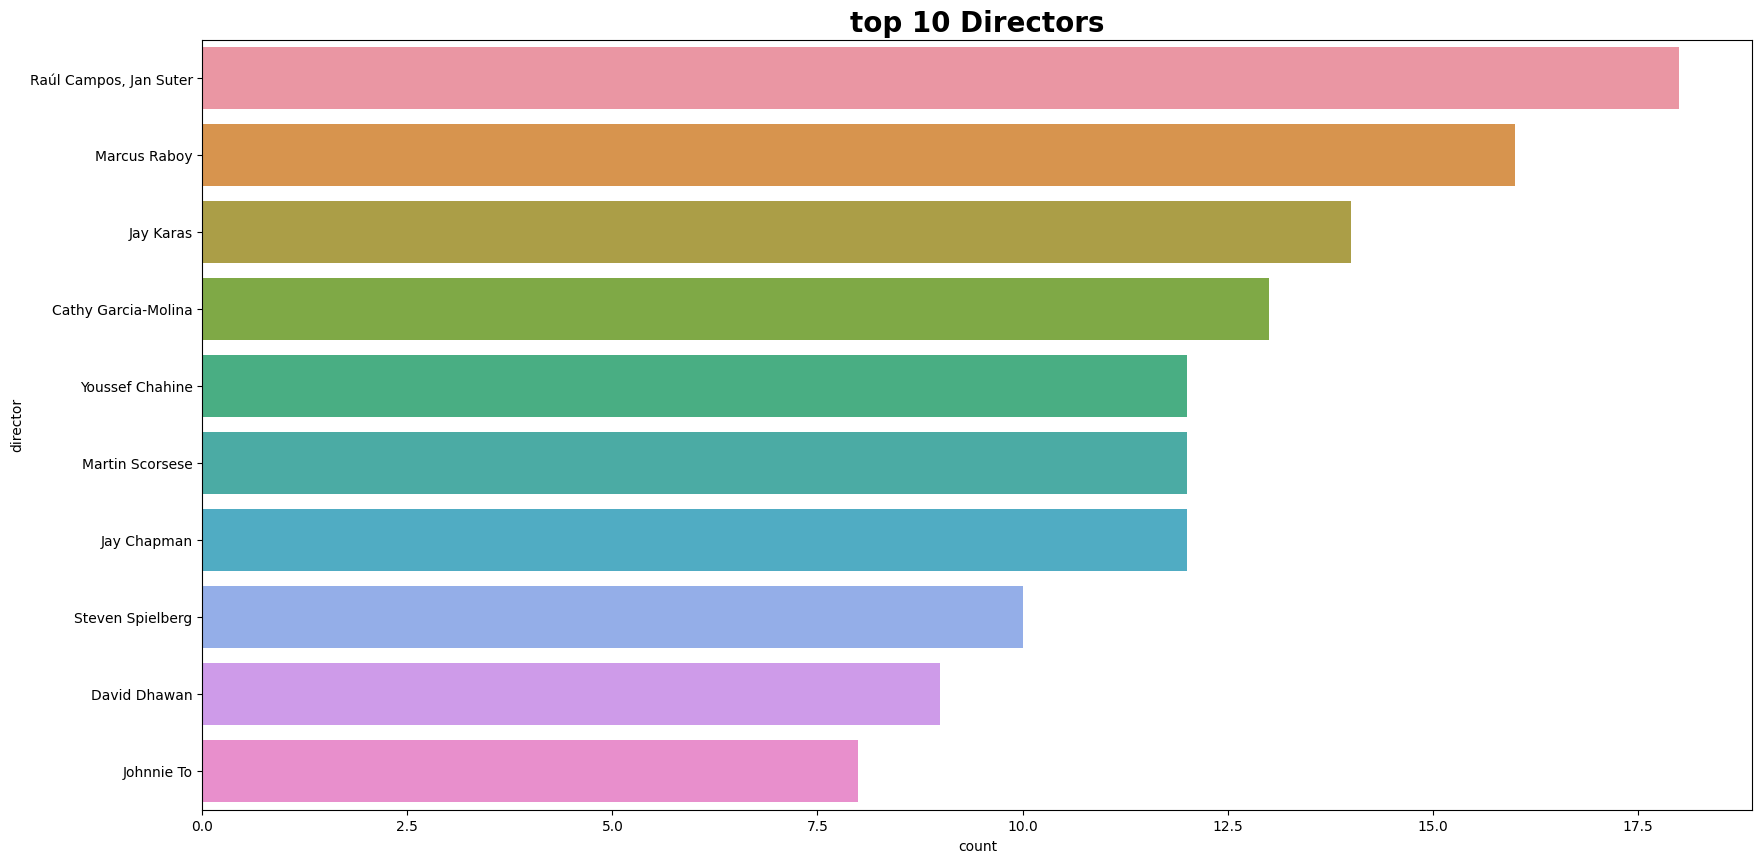

In [88]:
# Top 10 directors 

plt.figure(figsize=(20,10))
graph=sns.countplot(y='director',data=df,order=df.director.value_counts().head(10).index)
graph.set_title("top 10 Directors",fontsize=20,fontweight='bold')

In [89]:
# Adding 2 more columns

df['date_added']=pd.to_datetime(df['date_added'])
df['year_added']=df['date_added'].dt.year
df['month_added']=df['date_added'].dt.month
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres,description,year_added,month_added
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020.0,8.0
1,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,2017-12-15,2008,TV-MA,143,"Horror Movies, International Movies, Thrillers",An architect and his wife move into a castle t...,2017.0,12.0
2,s100,Movie,3 Heroines,Iman Brotoseno,"Reza Rahadian, Bunga Citra Lestari, Tara Basro...",Indonesia,2019-01-05,2016,TV-PG,124,"Dramas, International Movies, Sports Movies",Three Indonesian women break records by becomi...,2019.0,1.0
3,s1000,Movie,Blue Mountain State: The Rise of Thadland,Lev L. Spiro,"Alan Ritchson, Darin Brooks, James Cade, Rob R...",United States,2016-03-01,2016,R,90,Comedies,New NFL star Thad buys his old teammates' belo...,2016.0,3.0
4,s1001,TV Show,Blue Planet II,NaN,David Attenborough,United Kingdom,2018-12-03,2017,TV-G,1,"British TV Shows, Docuseries, Science & Nature TV",This sequel to the award-winning nature series...,2018.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s995,TV Show,Blown Away,NaN,NaN,Canada,2019-07-12,2019,TV-14,1,"International TV Shows, Reality TV",Ten master artists turn up the heat in glassbl...,2019.0,7.0
7783,s996,TV Show,Blue Exorcist,NaN,"Nobuhiko Okamoto, Jun Fukuyama, Kana Hanazawa,...",Japan,2020-09-01,2017,TV-MA,2,"Anime Series, International TV Shows",Determined to throw off the curse of being Sat...,2020.0,9.0
7784,s997,Movie,Blue Is the Warmest Color,Abdellatif Kechiche,"Léa Seydoux, Adèle Exarchopoulos, Salim Kechio...","France, Belgium, Spain",2016-08-26,2013,NC-17,180,"Dramas, Independent Movies, International Movies","Determined to fall in love, 15-year-old Adele ...",2016.0,8.0
7785,s998,Movie,Blue Jasmine,Woody Allen,"Cate Blanchett, Sally Hawkins, Alec Baldwin, L...",United States,2019-03-08,2013,PG-13,98,"Comedies, Dramas, Independent Movies",The high life leads to high anxiety for a fash...,2019.0,3.0


In [90]:
# Greater number of movies per year

df['year_added'].value_counts().reset_index().rename(columns={'index':'year','year_added':'total_movie'})

,year,total_movie
0,2019.0,2153
1,2020.0,2009
2,2018.0,1685
3,2017.0,1225
4,2016.0,443
5,2021.0,117
6,2015.0,88
7,2014.0,25
8,2011.0,13
9,2013.0,11


In [91]:
#percentage of movies per year

graph=px.pie(df,names='year_added', height=500,width=900, hole=0.3, title="yearly distribution")
graph.show()

In [92]:
# percentage of movies per month

graph=px.pie(df,names='month_added', height=500,width=900, hole=0.3, title='monthly distribution')
graph.show()

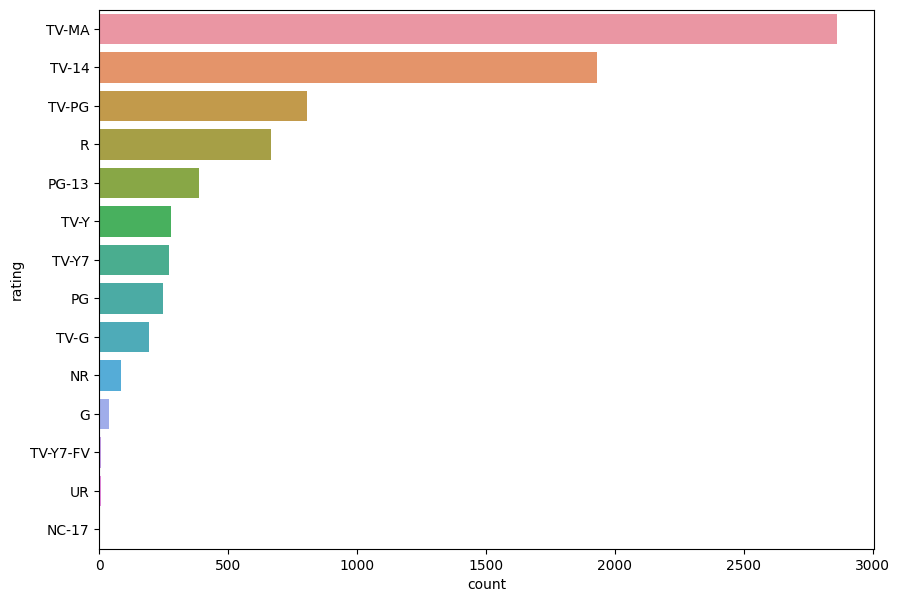

In [93]:
# displaying ratings

plt.figure(figsize=(10,7))
ax=sns.countplot(y=df['rating'], order=df['rating'].value_counts().index[0:])

In [94]:
#Display rating in percentage

graph=px.pie(df,names='rating', height=500,width=900, hole=0.3, title="rating distribution")
graph.show()

In [ ]:
!pip install wordcloud

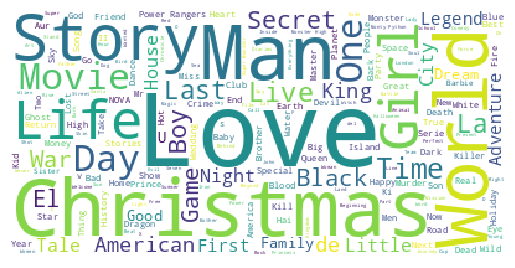

In [116]:
#Checking most commonly used words in title

df_wc=df['title']
text=" ".join(i for i in df_wc)

stopwords=set(STOPWORDS)

wordcloud=WordCloud(stopwords=stopwords, background_color='white').generate(text)

plt.imshow(wordcloud,interpolation='nearest')
plt.axis('off')
plt.show()

**Data Preprocessing**

**Stemming**

In [ ]:
stemmer = SnowballStemmer("english")

In [ ]:
def Apply_stemming(text):
  text = [stemmer.stem(word) for word in text.split()]
  return " ".join(text)

In [ ]:
#Applying stemming for better understanding of description

df['description'] = df['description'].apply(Apply_stemming)
df.head(5)

** Count Vectorization**

In [ ]:
# Count vectorization to convert text into numerical data

cv=CountVectorizer(max_features=8000,stop_words='english')

In [ ]:
cv

In [ ]:
#merging important variables for easy process

df['tags']=df['description']+df['genres']

In [ ]:
tags = df['tags']

In [ ]:
tags

In [ ]:
vector=cv.fit_transform(df['tags'].values.astype('U')).toarray()

In [ ]:
vector.shape

**Cosine Similarity**

In [ ]:
similarity = cosine_similarity(vector)

In [ ]:
new_df = df.drop(columns=['description', 'genres'])

In [ ]:
new_df

In [ ]:
#function for recommending movies

def recommend(movie): 
  movie_index = df[df['title']==movie].index[0]
  distance = similarity[movie_index]
  movie_list = sorted(list(enumerate(distance)),reverse=True, key=lambda x:x[1])[1:6]
  for i in movie_list:
    print(df.iloc[i[0]].title)

In [ ]:
#checking if that function works

recommend("3 Heroines")

**Sentiment Analysis**

In [ ]:
#scaping data from google

movie_reviews = []
url = 'https://www.google.com/search?q=movie+reviews+avengers+endgame'

In [ ]:
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')
for review in soup.find_all('div', {'class': 'b1hJbf'}):
    movie_reviews.append(review.get_text())

In [ ]:
#processing of removing punctuations and stopwords

nltk.download('stopwords')
nltk.download('punkt')

stop_words = set(stopwords.words('english'))
punctuations = set(punctuation)

def preprocessed_text(text):
    text = text.lower()

 # Tokenization 

    tokens = nltk.word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words and word not in punctuations]
    text = preprocessed_text(' '.join(tokens))
    return preprocessed_text

In [ ]:
#giving sentiment to labels

labels =['positive', 'negative', 'positive', 'positive', 'negative', 'positive', 'negative', 'negative', 'positive', 'positive']

In [ ]:
df = pd.DataFrame({'review': text, 'sentiment': labels})

In [ ]:
#Splitting training and testing data

X_train, X_test, y_train, y_test = train_test_split(df['review'], df['sentiment'], test_size=0.2, random_state=42)

In [ ]:
#Vectorization

vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

**Naive Bayes **

In [ ]:
nb = MultinomialNB()
nb.fit(X_train_vec, y_train)

In [ ]:
y_pred = nb.predict(X_test_vec)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

In [ ]:
pipeline = Pipeline([
    ('vectorizer', CountVectorizer(lowercase=True, stop_words='english', strip_accents='unicode')),
    ('classifier', MultinomialNB())
])

In [ ]:
scores = cross_val_score(pipeline, df['review'], df['sentiment'], cv=3)

In [ ]:
print(scores)

**K Nearest Neighbors**


In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df['review'], df['sentiment'], test_size=0.2, random_state=42)

In [ ]:
knn.fit(X_train_vec, y_train)

# Predict the sentiment of the test data
y_pred = knn.predict(X_test_vec)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

deployment

In [ ]:
# Serializing

pickle.dump(new_df,open('df.pkl','wb'))
pickle.dump(similarity,open('similarity.pkl','wb'))

In [ ]:
new_df['title'].values

In [ ]:
new_df.to_dict()

In [ ]:
pickle.dump(new_df.to_dict(), open('df_dict.pkl','wb'))

In [ ]:
# Installing Streamlit

!pip install -q streamlit

In [ ]:
#Funtion that are passing to Streamlit to recommend movies
Import streamlit as st

for col in df.columns:
    print(col)
for col in new_df.columns:
    print(col)
print('D')
def recommend(movie): 
  print(df)
  movie_index = new_df[new_df['title']==movie].index[0]
  distance = similarity[movie_index]
  movie_list = sorted(list(enumerate(distance)),reverse=True, key=lambda x:x[1])[1:6]
  recommended_movies = []
  for i in movie_list:
    recommended_movies.append(new_df.iloc[i[0]].title)
  return recommended_movies

df_dict = pickle.load(open('df_dict.pkl','rb'))
tags = pd.DataFrame(df_dict)

similarity = pickle.load(open('similarity.pkl','rb'))

st.title('Netflix Recommendation system')

option= st.selectbox('select your movie:', tags['title'].values)

if st.button('Similar movies'):
  recommendations = recommend(option)
  for i in recommendations:
    st.write(i)

In [ ]:
!npm install localtunnel

In [ ]:
!streamlit run /content/file_py.ipynb &>/content/logs.txt &

In [ ]:
# Access using this local host link

!npx localtunnel --port 8501